In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [150]:
import warnings 
warnings.filterwarnings('ignore')

In [151]:
df = pd.read_csv('bengaluru_house_prices.csv')
df1 = df[['location','size','total_sqft','price','bath']]

In [152]:
df1.head()

,location,size,total_sqft,price,bath
0,Electronic City Phase II,2 BHK,1056,39.07,2.0
1,Chikka Tirupathi,4 Bedroom,2600,120.00,5.0
2,Uttarahalli,3 BHK,1440,62.00,2.0
3,Lingadheeranahalli,3 BHK,1521,95.00,3.0
4,Kothanur,2 BHK,1200,51.00,2.0


In [153]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   price       13320 non-null  float64
 4   bath        13247 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [154]:
df1.describe()

,price,bath
count,13320.000000,13247.000000
mean,112.565627,2.692610
std,148.971674,1.341458
min,8.000000,1.000000
25%,50.000000,2.000000
50%,72.000000,2.000000
75%,120.000000,3.000000
max,3600.000000,40.000000


In [155]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
price          0
bath          73
dtype: int64

In [156]:
df2=df1.dropna()

In [157]:
df2.isnull().sum()

location      0
size          0
total_sqft    0
price         0
bath          0
dtype: int64

In [158]:
df2.head()

,location,size,total_sqft,price,bath
0,Electronic City Phase II,2 BHK,1056,39.07,2.0
1,Chikka Tirupathi,4 Bedroom,2600,120.00,5.0
2,Uttarahalli,3 BHK,1440,62.00,2.0
3,Lingadheeranahalli,3 BHK,1521,95.00,3.0
4,Kothanur,2 BHK,1200,51.00,2.0


In [159]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [160]:
df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))

In [161]:
df2['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [162]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [163]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [164]:
df2[~df2['total_sqft'].apply(is_float)].head()

,location,size,total_sqft,price,bath,bhk
30,Yelahanka,4 BHK,2100 - 2850,186.000,4.0,4
122,Hebbal,4 BHK,3067 - 8156,477.000,4.0,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,54.005,2.0,2
165,Sarjapur,2 BHK,1145 - 1340,43.490,2.0,2
188,KR Puram,2 BHK,1015 - 1540,56.800,2.0,2


In [165]:
def convert_sqft_to_num(x):
    tokens=x.split('-')
    if len(tokens) ==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [166]:
#testing the function 
print('first:',convert_sqft_to_num('2134-3453'))
print('second',convert_sqft_to_num('3342'))

first: 2793.5
second 3342.0


In [167]:
df3= df2.copy()
df3.total_sqft = df3.total_sqft.apply(convert_sqft_to_num)
df3 = df3[df3.total_sqft.notnull()]
df3.head()

,location,size,total_sqft,price,bath,bhk
0,Electronic City Phase II,2 BHK,1056.0,39.07,2.0,2
1,Chikka Tirupathi,4 Bedroom,2600.0,120.00,5.0,4
2,Uttarahalli,3 BHK,1440.0,62.00,2.0,3
3,Lingadheeranahalli,3 BHK,1521.0,95.00,3.0,3
4,Kothanur,2 BHK,1200.0,51.00,2.0,2


In [168]:
df3.loc[188]

location      KR Puram
size             2 BHK
total_sqft      1277.5
price             56.8
bath               2.0
bhk                  2
Name: 188, dtype: object

*FEATURE ENGINERRING AND DIMENISONALITY REDUCTION*

In [169]:
df4 = df3.copy()

In [170]:
df4['price/sqft'] = df4['price']*100000/df4['total_sqft']
#price by square feet =  price divided by total sqft

In [171]:
df4

,location,size,total_sqft,price,bath,bhk,price/sqft
0,Electronic City Phase II,2 BHK,1056.0,39.07,2.0,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,120.00,5.0,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,62.00,2.0,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,95.00,3.0,3,6245.890861
4,Kothanur,2 BHK,1200.0,51.00,2.0,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,231.00,4.0,5,6689.834926
13316,Richards Town,4 BHK,3600.0,400.00,5.0,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,60.00,2.0,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,488.00,4.0,4,10407.336319


In [172]:
len(df4.location.unique())

1298

In [173]:
df4.location = df4.location.apply(lambda x: x.strip())
location_stats = df4.groupby('location')['location'].agg('count')
location_stats

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1287, dtype: int64

In [174]:
len(location_stats[location_stats<=10])

1047

In [175]:
location_less_than_10 = location_stats[location_stats<=10]

In [176]:
location_less_than_10.sample(10)

location
Anekal - Hosur Road      1
Goraguntepalya           1
Akshya Nagar             5
Arasanakunte             1
7th Block Koramangala    1
Manorayana Palya         3
Dena Bank Colony         2
CQAL Layout              2
Friends Colony           2
Palanahalli              3
Name: location, dtype: int64

In [177]:
df4.location = df4['location'].apply(lambda x:'other locs'if x in location_less_than_10 else x)
len(df4.location.unique())

241

In [178]:
df4.head(10)

,location,size,total_sqft,price,bath,bhk,price/sqft
0,Electronic City Phase II,2 BHK,1056.0,39.07,2.0,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,120.00,5.0,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,62.00,2.0,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,95.00,3.0,3,6245.890861
4,Kothanur,2 BHK,1200.0,51.00,2.0,2,4250.000000
5,Whitefield,2 BHK,1170.0,38.00,2.0,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,204.00,4.0,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,600.00,4.0,4,18181.818182
8,Marathahalli,3 BHK,1310.0,63.25,3.0,3,4828.244275
9,other locs,6 Bedroom,1020.0,370.00,6.0,6,36274.509804


*REMOVING OUTLIERS BY MINIMUM THRESHOLD PER BHK TO BE 300SQFT*

In [179]:
df4[df4.total_sqft/df4.bhk<300].head()

,location,size,total_sqft,price,bath,bhk,price/sqft
9,other locs,6 Bedroom,1020.0,370.0,6.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,200.0,9.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,150.0,4.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,85.0,7.0,8,6296.296296
70,other locs,3 Bedroom,500.0,100.0,3.0,3,20000.000000


In [180]:
df4.shape

(13200, 7)

In [181]:
df5 = df4[~(df4.total_sqft/df4.bhk<300)]
df5.sample(5)

,location,size,total_sqft,price,bath,bhk,price/sqft
11719,Singasandra,2 BHK,1465.0,60.00,2.0,2,4095.563140
1914,other locs,2 BHK,955.0,53.55,2.0,2,5607.329843
6892,other locs,3 Bedroom,2000.0,90.00,3.0,3,4500.000000
353,Akshaya Nagar,2 BHK,1388.0,57.00,2.0,2,4106.628242
7055,other locs,2 Bedroom,600.0,39.00,2.0,2,6500.000000


In [182]:
df5.rename(columns={'price/sqft' : 'price_per_sqft'},inplace=True )

In [183]:
df5.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [184]:
 def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df6 = remove_pps_outliers(df5)

In [185]:
df6

,location,size,total_sqft,price,bath,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,428.00,4.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,194.00,3.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,235.00,2.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,130.00,2.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,148.00,2.0,2,11983.805668
...,...,...,...,...,...,...,...
10237,other locs,2 BHK,1353.0,110.00,2.0,2,8130.081301
10238,other locs,1 Bedroom,812.0,26.00,1.0,1,3201.970443
10239,other locs,3 BHK,1440.0,63.93,2.0,3,4439.583333
10240,other locs,2 BHK,1075.0,48.00,2.0,2,4465.116279


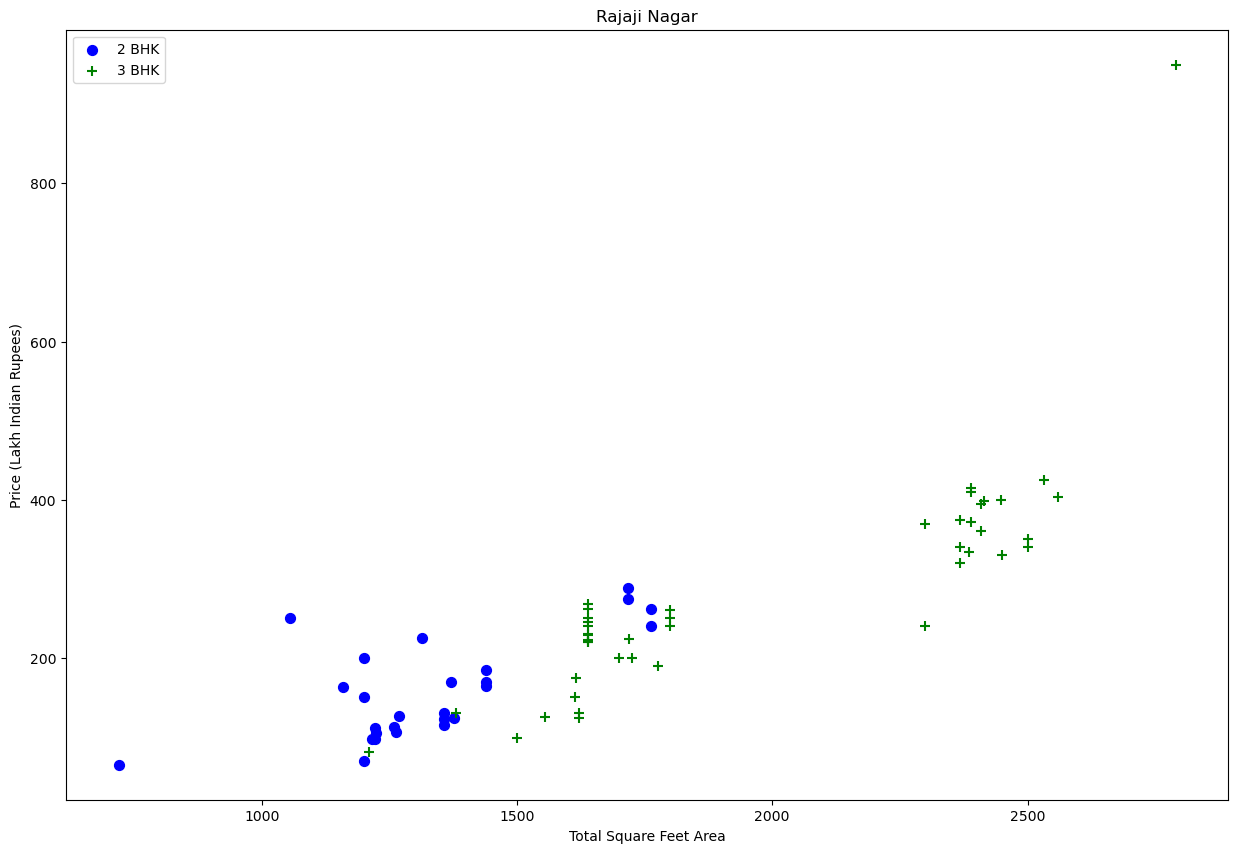

In [186]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    plt.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df5,'Rajaji Nagar')

In [187]:
df6['location'].value_counts()

location
other locs              2306
Whitefield               479
Sarjapur  Road           296
Electronic City          279
Kanakpura Road           190
                        ... 
Vishveshwarya Layout       4
Vishwapriya Layout         4
Banjara Layout             4
HAL 2nd Stage              4
Marsur                     3
Name: count, Length: 241, dtype: int64

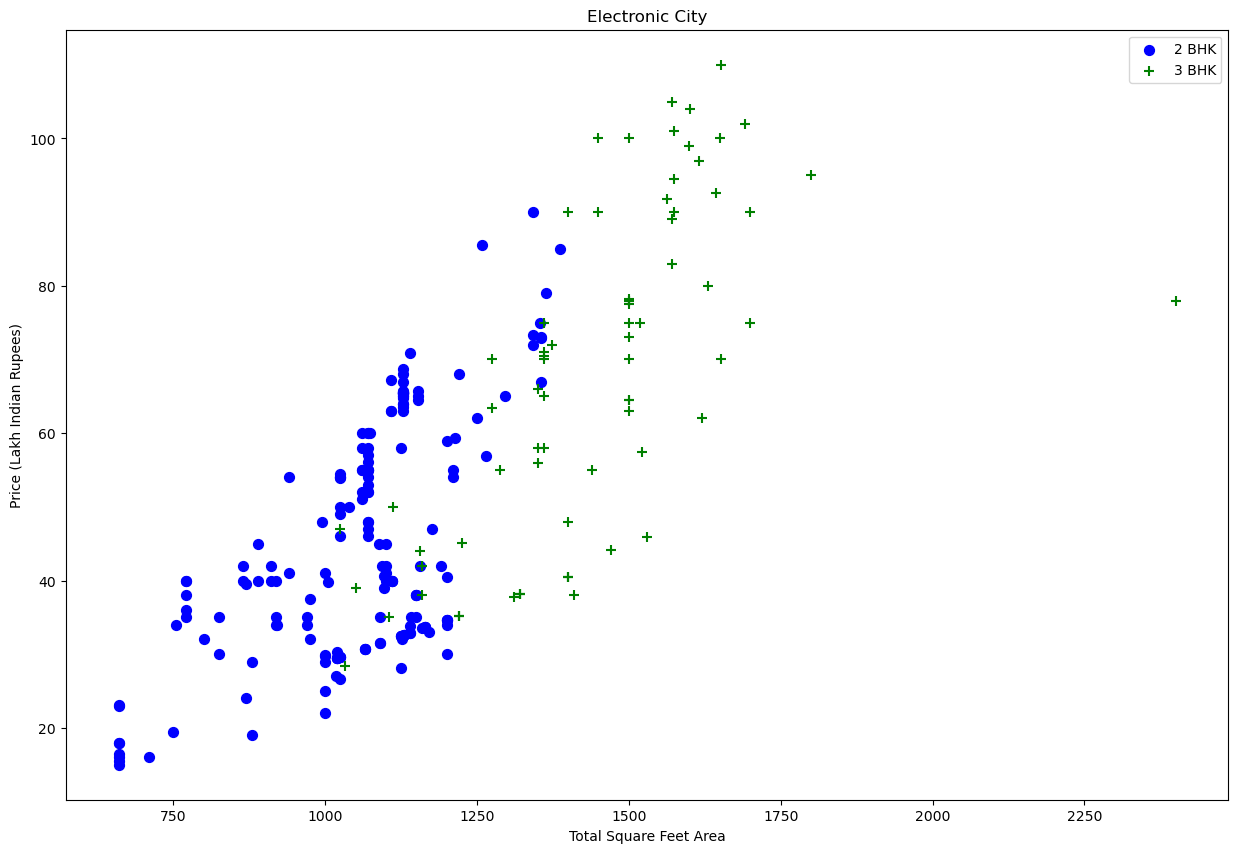

In [188]:
plot_scatter_chart(df6,'Electronic City')

In [189]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [190]:
df7 = remove_bhk_outliers(df6)

In [191]:
df7.shape

(7317, 7)

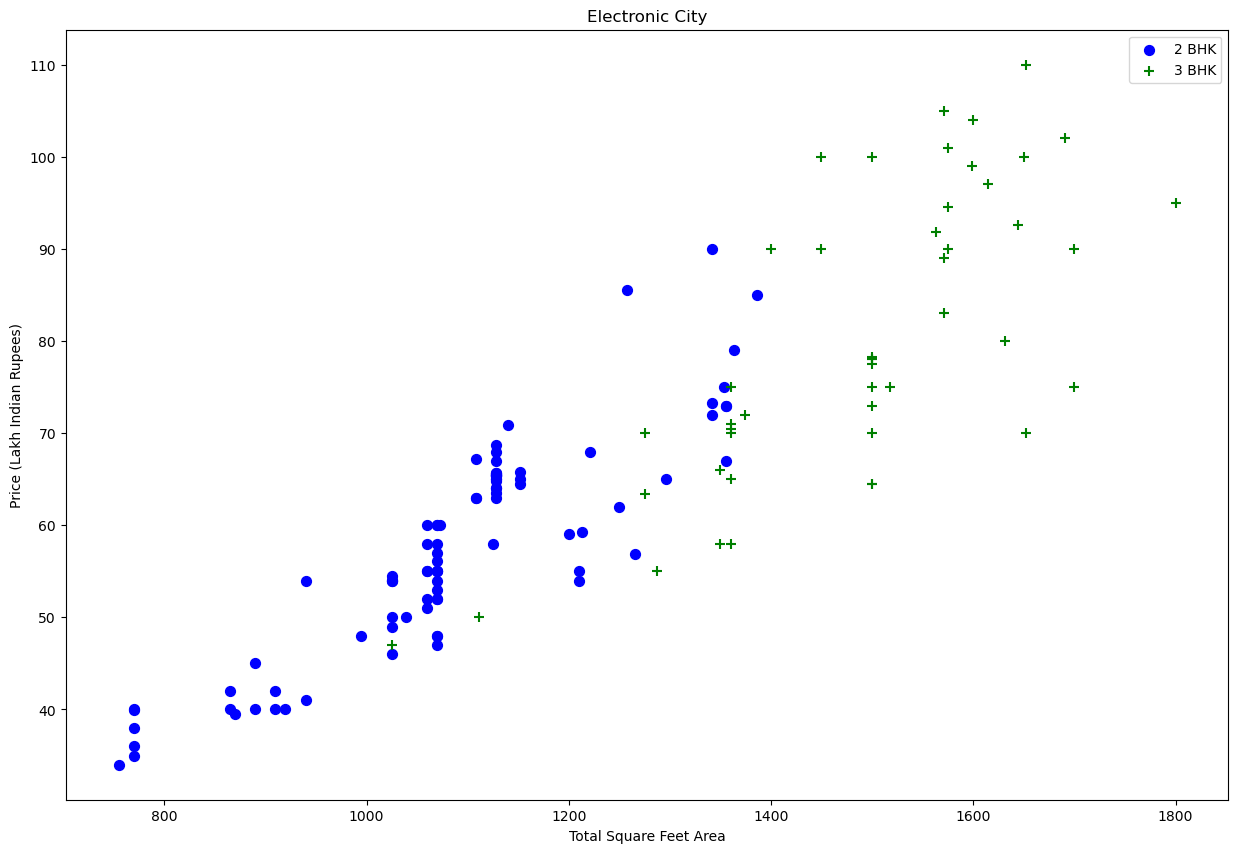

In [192]:
plot_scatter_chart(df7,'Electronic City')


Text(0, 0.5, 'Count')

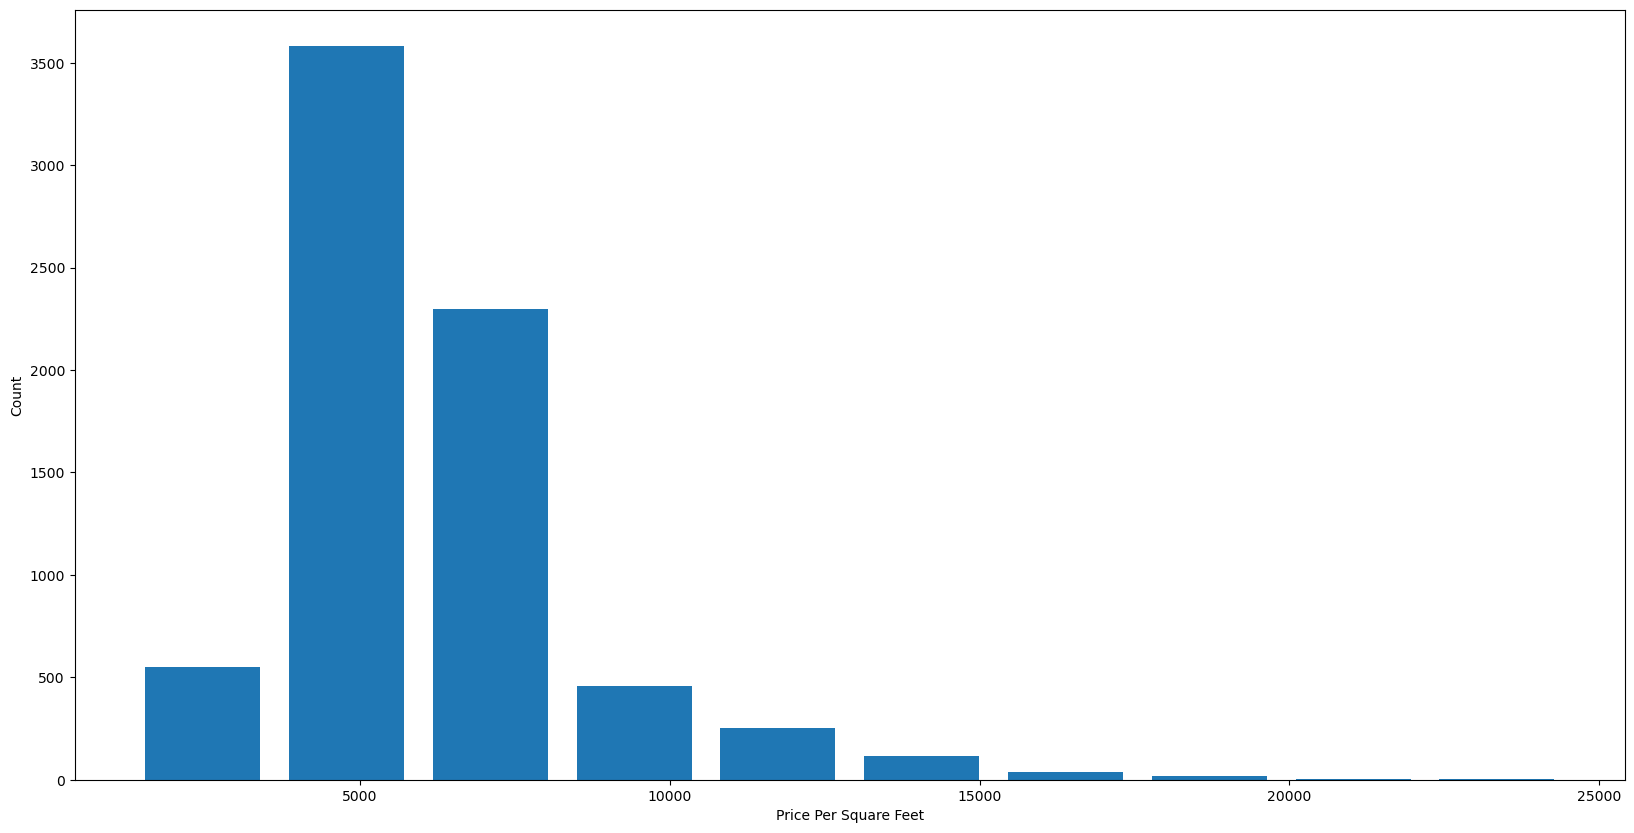

In [193]:
plt.rcParams["figure.figsize"] = (20,10)
plt.hist(df7.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [194]:
df7.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [195]:
df7[df7['bath']>10]

,location,size,total_sqft,price,bath,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,160.0,12.0,10,4000.000000
8483,other locs,10 BHK,12000.0,525.0,12.0,10,4375.000000
8572,other locs,16 BHK,10000.0,550.0,16.0,16,5500.000000
9306,other locs,11 BHK,6000.0,150.0,12.0,11,2500.000000
9637,other locs,13 BHK,5425.0,275.0,13.0,13,5069.124424


Text(0, 0.5, 'counts')

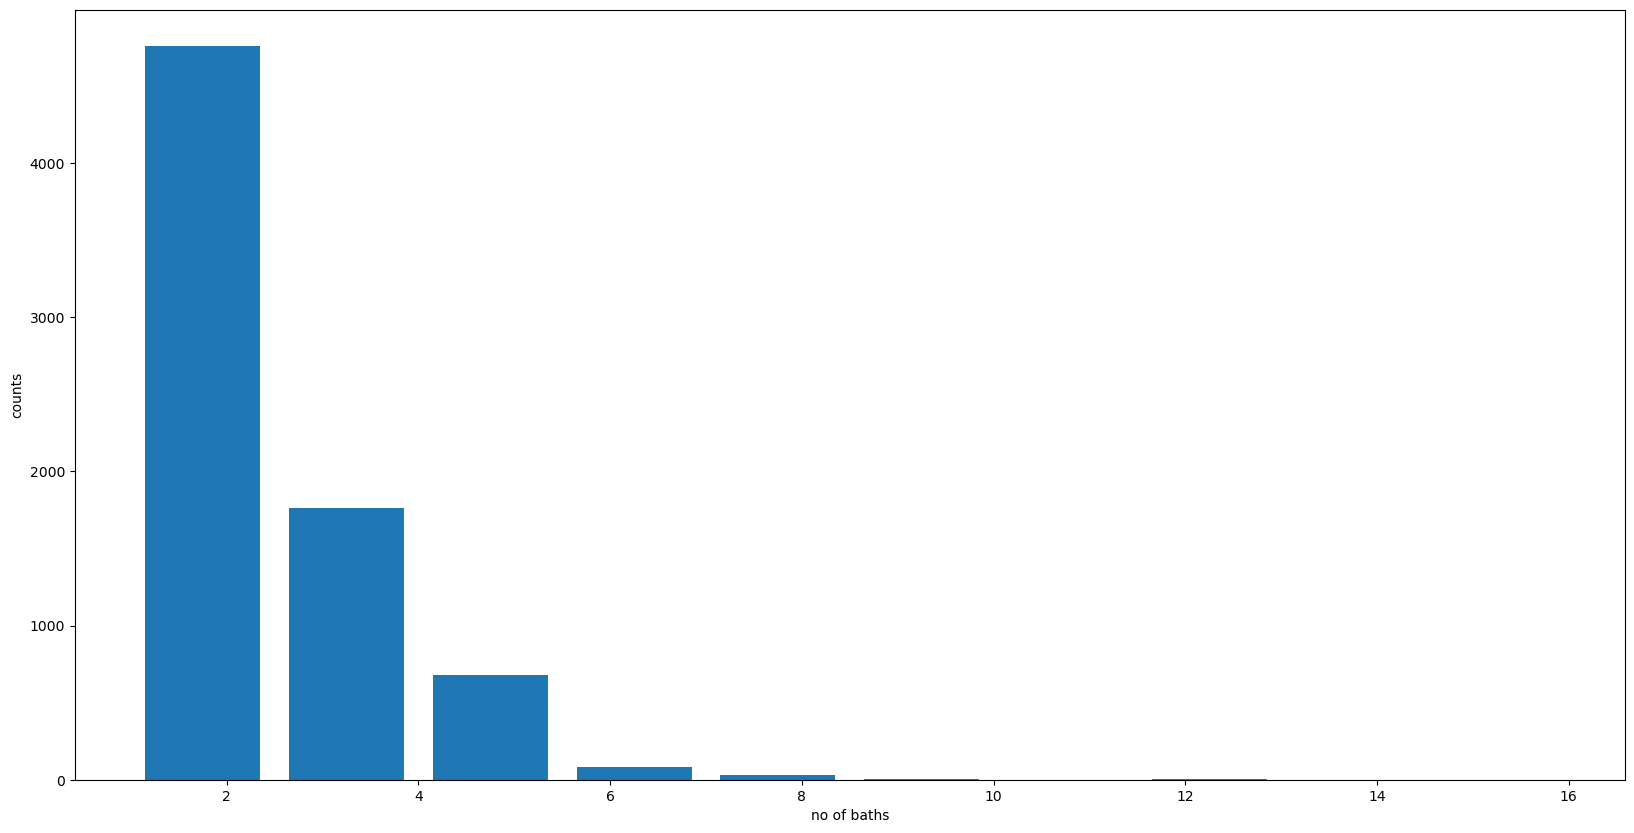

In [196]:

plt.hist(df7.bath,rwidth = 0.8)
plt.xlabel('no of baths')
plt.ylabel('counts')

In [197]:
df7[df7.bath>df7.bhk+2]

,location,size,total_sqft,price,bath,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,80.0,7.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,450.0,8.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,116.0,6.0,3,6423.034330
8408,other locs,6 BHK,11338.0,1000.0,9.0,6,8819.897689


In [198]:
df7.shape

(7317, 7)

In [199]:
df8 = df7[df7.bath<df7.bhk+2]

In [200]:
df8.shape

(7239, 7)

In [201]:
df8.head()

,location,size,total_sqft,price,bath,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,428.0,4.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,194.0,3.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,235.0,2.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,130.0,2.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,148.0,2.0,2,11983.805668


In [202]:
df9 = df8.drop(['price_per_sqft','size'],axis='columns')

In [203]:
df9.head()

,location,total_sqft,price,bath,bhk
0,1st Block Jayanagar,2850.0,428.0,4.0,4
1,1st Block Jayanagar,1630.0,194.0,3.0,3
2,1st Block Jayanagar,1875.0,235.0,2.0,3
3,1st Block Jayanagar,1200.0,130.0,2.0,3
4,1st Block Jayanagar,1235.0,148.0,2.0,2


### using python get-dummies for location, for encoding location column

In [204]:
dummies = pd.get_dummies(df9.location,dtype=int)

In [205]:
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other locs
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [206]:
#df9 currently
df10 = pd.concat([df9,dummies.drop('other locs',axis='columns')],axis='columns')
df10.head()

,location,total_sqft,price,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,428.0,4.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,194.0,3.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,235.0,2.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,130.0,2.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,148.0,2.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [207]:
df11 = df10.drop('location',axis='columns')
df11.head(2)

,total_sqft,price,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,428.0,4.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,194.0,3.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## model building


In [208]:
X = df11.drop(['price'],axis='columns')
y = df11.price

In [209]:
from sklearn.model_selection import train_test_split

In [210]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [211]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (5791, 243)
y_train shape: (5791,)
x_test shape: (5791,)
y_test shape: (1448,)


In [212]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.8629132245229485

In [213]:
#
#ShuffleSplit is a cross-validation iterator provided by scikit-learn. It is used to generate indices to split data into train/test sets while shuffling the data. This iterator randomly shuffles the data and then splits it into train and test sets for multiple iterations.


In [214]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82702546, 0.86027005, 0.85322178, 0.8436466 , 0.85481502])

In [221]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'copy_X': [True, False],
                'fit_intercept': [True, False],
                'n_jobs': [1, 2, -1]}
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.847951,"{'copy_X': True, 'fit_intercept': False, 'n_jo..."
1,lasso,0.726757,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.712977,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [222]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr.predict([x])[0]

In [226]:
predict_price('1st Phase JP Nagar',1000, 2, 2)
# name of location , sqft area , bedroom , bathroom

83.86570258324036

In [227]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

86.08062284998763

In [228]:
predict_price('Indira Nagar',1000, 2, 2)

193.31197733179548

In [236]:
predict_price('Indira Nagar',1000,4,3)

199.2438443053076

In [237]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr,f)

In [240]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))